In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
df_ratings = pd.read_csv(r"C:\Users\aloka\downloads\ratings.csv")
df_movies = pd.read_csv(r"C:\Users\aloka\downloads\movies.csv")

In [54]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [55]:
df_ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [56]:
data = pd.merge(df_ratings,df_movies, on='movieId')

In [57]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
for i in range(len(data['genres'])):
    data['genres'][i].split(pat='|',expand=True)
     

In [ ]:
data['genres'].head()

In [58]:
print(data.groupby('title')['rating'].mean().sort_values(ascending=True).head())

title
Rust and Bone (De rouille et d'os) (2012)     0.5
The Emoji Movie (2017)                        0.5
The Butterfly Effect 3: Revelations (2009)    0.5
Follow Me, Boys! (1966)                       0.5
The Beast of Hollow Mountain (1956)           0.5
Name: rating, dtype: float64


In [59]:
print(data.groupby('title')['rating'].count().sort_values(ascending=True))

title
'71 (2014)                                                                          1
Latter Days (2003)                                                                  1
Late Shift, The (1996)                                                              1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004)      1
Late Night Shopping (2001)                                                          1
Late Marriage (Hatuna Meuheret) (2001)                                              1
Last of the Dogmen (1995)                                                           1
Last Year's Snow Was Falling (1983)                                                 1
Last Winter, The (2006)                                                             1
Last Wedding, The (Kivenpyörittäjän kylä) (1995)                                    1
Last Wave, The (1977)                                                               1
Last Waltz, The (1978)                          

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [61]:
df=pd.DataFrame(data.groupby('title')['rating'].mean().sort_values(ascending=True))
df['count_rating']=pd.DataFrame(data.groupby('title')['rating'].count().sort_values(ascending=True))

In [62]:
df.head()

,rating,count_rating
title,,
Rust and Bone (De rouille et d'os) (2012),0.5,1
The Emoji Movie (2017),0.5,1
The Butterfly Effect 3: Revelations (2009),0.5,1
"Follow Me, Boys! (1966)",0.5,1
The Beast of Hollow Mountain (1956),0.5,1


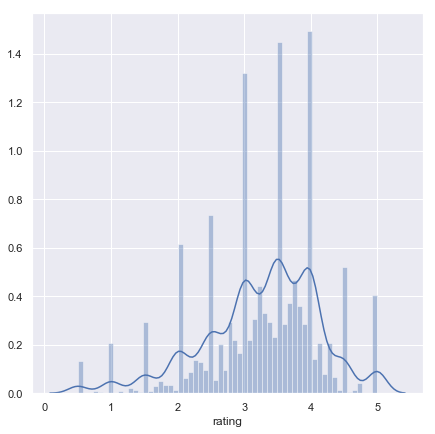

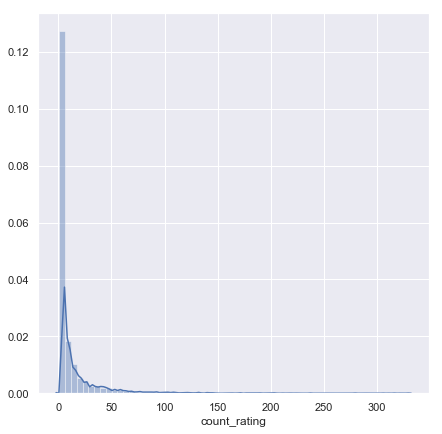

In [63]:
for x in df.columns :
    plt.figure(figsize=(7,7))
    sns.distplot(df[x],bins=60)
    sns.set()
    


In [78]:
print(data['genres'].isnull().sum())

0


In [79]:
for i in range(len(data['genres'])) :
    
    if len(data['genres'][i])==0 :
         data.drop(i,axis=0,inplace=True)
        
    
   

In [80]:
data.shape

(100836, 6)

In [93]:
rating_data = data.pivot_table(index='userId', columns='title', values=['rating'])
rating_data.head()

rating                                          \
title  '71 (2014) 'Hellboy': The Seeds of Creation (2004)   
userId                                                      
1             NaN                                     NaN   
2             NaN                                     NaN   
3             NaN                                     NaN   
4             NaN                                     NaN   
5             NaN                                     NaN   

                                                                             \
title  'Round Midnight (1986) 'Salem's Lot (2004) 'Til There Was You (1997)   
userId                                                                        
1                         NaN                 NaN                       NaN   
2                         NaN                 NaN                       NaN   
3                         NaN                 NaN                       NaN   
4                         NaN                 NaN                       NaN   
5                         NaN                 NaN                       NaN   

                                                           \
title  'Tis the Season for Love (2015) 'burbs, The (1989)   
userId                                                      
1                                  NaN                NaN   
2                                  NaN                NaN   
3                                  NaN                NaN   
4                                  NaN                NaN   
5                                  NaN                NaN   

                                                         \
title  'night Mother (1986) (500) Days of Summer (2009)   
userId                                                    
1                       NaN                         NaN   
2                       NaN                         NaN   
3                       NaN                         NaN   
4                       NaN                         NaN   
5                       NaN                         NaN   

                                       ...                           \
title  *batteries not included (1987)  ... Zulu (2013) [REC] (2007)   
userId                                 ...                            
1                                 NaN  ...         NaN          NaN   
2                                 NaN  ...         NaN          NaN   
3                                 NaN  ...         NaN          NaN   
4                                 NaN  ...         NaN          NaN   
5                                 NaN  ...         NaN          NaN   

                                              \
title  [REC]² (2009) [REC]³ 3 Génesis (2012)   
userId                                         
1                NaN                     NaN   
2                NaN                     NaN   
3                NaN                     NaN   
4                NaN                     NaN   
5                NaN                     NaN   

                                                                               \
title  anohana: The Flower We Saw That Day - The Movie (2013) eXistenZ (1999)   
userId                                                                          
1                                                     NaN                 NaN   
2                                                     NaN                 NaN   
3                                                     NaN                 NaN   
4                                                     NaN                 NaN   
5                                                     NaN                 NaN   

                                                                        \
title  xXx (2002) xXx: State of the Union (2005) ¡Three Amigos! (1986)   
userId                                                                   
1             NaN                            NaN                   4.0   
2             NaN           

In [91]:
simm_movies = rating_data.corrwith(rating_data['Toy Story (1995)'])

corr_movies = pd.DataFrame(simm_movies, columns=['Corr'])
corr_movies.dropna(inplace=True)
corr_movies.sort_values('Corr',ascending=False).head(7)

,Corr
title,
Land Before Time III: The Time of the Great Giving (1995),1.0
Faster Pussycat! Kill! Kill! (1965),1.0
Amen. (2002),1.0
"Machine Girl, The (Kataude mashin gâru) (2008)",1.0
Waydowntown (2000),1.0
Brigadoon (1954),1.0
Project X (1987),1.0
